In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
/kaggle/input/covid19-image-dataset/Co

In [2]:
IMAGE_SIZE = [224, 224] 

train_path = '../input/covid19-image-dataset/Covid19-dataset/train'
valid_path = '../input/covid19-image-dataset/Covid19-dataset/test'

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


2022-03-23 23:25:20.942699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:25:21.025616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:25:21.026311: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:25:21.027475: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg.layers:
  layer.trainable=False

In [6]:
folders=glob( '../input/covid19-image-dataset/Covid19-dataset/train/*')

In [7]:
x=Flatten()(vgg.output)

prediction=Dense(len(folders),activation='softmax')(x)


model = Model(inputs=vgg.input, outputs=prediction)


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    rotation_range=20,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-23 23:25:26.676435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-03-23 23:25:30.128967: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 26s 2s/step - loss: 1.6848 - accuracy: 0.4382 - val_loss: 0.6665 - val_accuracy: 0.6515
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.6081 - accuracy: 0.7371 - val_loss: 0.7462 - val_accuracy: 0.6970
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.4477 - accuracy: 0.8008 - val_loss: 0.2876 - val_accuracy: 0.8939
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 0.3456 - accuracy: 0.8606 - val_loss: 0.3445 - val_accuracy: 0.8030
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 0.2564 - accuracy: 0.9084 - val_loss: 0.2309 - val_accuracy: 0.9242
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.2452 - accuracy: 0.9004 - val_loss: 0.3302 - val_accuracy: 0.8182
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.2306 - accuracy: 0.9323 - val_loss: 0.2373 - val_accuracy: 0.8788
Epoch 8/15
8/8 [=============================

In [14]:
r.history

{'loss': [1.684774398803711,
  0.6080502867698669,
  0.44767674803733826,
  0.3456108868122101,
  0.25635817646980286,
  0.24518121778964996,
  0.23061631619930267,
  0.19904156029224396,
  0.17150728404521942,
  0.14222347736358643,
  0.20792976021766663,
  0.15409009158611298,
  0.14074519276618958,
  0.14149519801139832,
  0.10712451487779617],
 'accuracy': [0.43824702501296997,
  0.737051784992218,
  0.8007968068122864,
  0.8605577945709229,
  0.9083665609359741,
  0.9003984332084656,
  0.9322709441184998,
  0.9322709441184998,
  0.9601593613624573,
  0.9561753273010254,
  0.9322709441184998,
  0.9402390718460083,
  0.9601593613624573,
  0.9641434550285339,
  0.9760956168174744],
 'val_loss': [0.6664706468582153,
  0.7461579442024231,
  0.28764238953590393,
  0.34447187185287476,
  0.23092779517173767,
  0.3301963210105896,
  0.23727257549762726,
  0.22259823977947235,
  0.19308221340179443,
  0.2366473376750946,
  0.4435059726238251,
  0.23510676622390747,
  0.18609975278377533,
 

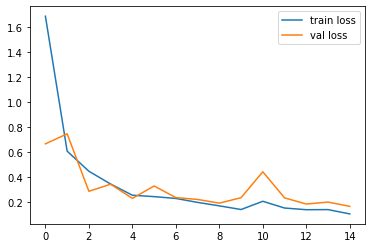

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

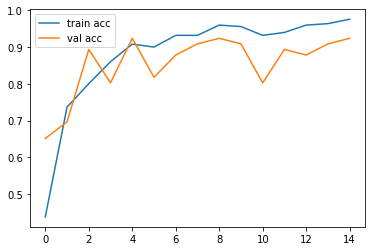

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
y_pred=model.predict(test_set)
y_pred

array([[4.37261595e-04, 9.15077142e-03, 9.90411937e-01],
       [9.73993540e-01, 2.51992270e-02, 8.07163306e-04],
       [9.45451102e-05, 9.81309533e-01, 1.85958929e-02],
       [9.93617058e-01, 2.41128600e-05, 6.35878416e-03],
       [9.50696468e-01, 1.35317342e-02, 3.57718654e-02],
       [4.04338446e-03, 9.93107140e-01, 2.84951366e-03],
       [1.13792294e-05, 9.44468319e-01, 5.55202551e-02],
       [9.95691478e-01, 2.05075159e-03, 2.25785188e-03],
       [2.36554042e-04, 6.42832100e-01, 3.56931299e-01],
       [6.39321804e-02, 1.21419288e-01, 8.14648569e-01],
       [1.24822051e-04, 1.59450471e-01, 8.40424776e-01],
       [9.98229444e-01, 2.26779866e-05, 1.74782169e-03],
       [2.60226312e-04, 9.63676333e-01, 3.60634476e-02],
       [1.04369968e-03, 5.31890810e-01, 4.67065513e-01],
       [9.80767429e-01, 1.00508893e-04, 1.91319566e-02],
       [5.44731192e-05, 2.31783599e-01, 7.68161952e-01],
       [2.27020448e-03, 9.32922006e-01, 6.48078471e-02],
       [4.95872955e-05, 8.84383